This work presents an **exploratory data analysis (EDA)** of the Autism Screening Adult dataset, focusing on understanding its structure, variable types, and statistical properties. The analysis includes frequency exploration, descriptive statistics, and visual analysis to identify relevant patterns in both numerical and categorical data. Additionally, correlation and association analyses are applied to examine relationships between variables using appropriate statistical measures. Finally, the project consolidates these findings to support initial hypotheses and guide subsequent modeling stages.

## Index
- [1. Descripción del Dataset](#sec1)
- [2. Data Upload](#sec2)
- [3. Data Exploration](#sec3)
  - [3.1 Dataset structure](#sec31)
  - [3.2 Frequency Analysis](#sec32)
- [4. Statistical Summary](#sec4)
  - [4.1 General Data Summary](#sec41)
- [5. Data Visualization](#sec5)
- [6. Analysis of Categorical Variables](#sec6)
- [7. Correlation Analysis](#sec7)
  - [7.1 Correlation Numeric Analysis](#sec71)
  - [7.2 Asociacion Categorical Analysis](#sec72)
- [8. Hipótesis Iniciales](#sec8)


## <span id="sec1"></span> **1. Dataset Description**
---

The 'Autism Screening Adult' dataset was used, obtained from the UCI Machine Learning Repository, it contains responses to a standardized questionnaire designed to detect traits associated with the autism spectrum in adults. It includes test items, demographic information, and a target variable that indicates whether or not the participant shows signs of ASD.

## <span id="sec2"></span> **2. Data Upload**
---
The “Autism Screening Adult” dataset was used, obtained from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/426/autism+screening+adult. The file was downloaded in .arff format and subsequently loaded into a DataFrame for analysis.


In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from scipy.io import arff

In [ ]:
data, meta = arff.loadarff("../_attachments/datasets/Autism-Adult-Data.arff")
df = pd.DataFrame(data)
df = df.apply(
    lambda col: col.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
)
target = 'Class/ASD'
print("Dataset loaded successfully")
print(df.shape)

Dataset loaded successfully
(704, 21)


/tmp/ipykernel_50886/3040600427.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)


## <span id="sec3"></span> **3. Data Exploration**

---
The **Autism Screening Adult** dataset contains **704 records** and **21 variables** related to demographic factors, family background, and responses to a **10-item screening questionnaire** (A1_Score to A10_Score). The target variable, `Class/ASD`, is **binary**, indicating the **presence (1)** or **absence (0)** of autism spectrum disorder indicators, defining a **supervised classification problem**.

Most variables are **binary (0/1)**, which simplifies preprocessing and model training. The only column with missing values is `age`, with **2 missing records**. The variables `gender`, `ethnicity`, `age_desc`, and `relation` are **nominal categorical** and require encoding. The variable `result` represents the **total questionnaire score**, while `used_app_before`, `jundice`, and `austim` capture relevant conditions or prior background information.

The identified variables are listed below:

| Variable        | Variable Type                          |
|-----------------|----------------------------------------|
| A1_Score        | Dichotomous categorical (0/1)           |
| A2_Score        | Dichotomous categorical (0/1)           |
| A3_Score        | Dichotomous categorical (0/1)           |
| A4_Score        | Dichotomous categorical (0/1)           |
| A5_Score        | Dichotomous categorical (0/1)           |
| A6_Score        | Dichotomous categorical (0/1)           |
| A7_Score        | Dichotomous categorical (0/1)           |
| A8_Score        | Dichotomous categorical (0/1)           |
| A9_Score        | Dichotomous categorical (0/1)           |
| A10_Score       | Dichotomous categorical (0/1)           |
| age             | Discrete numerical                      |
| gender          | Nominal categorical                     |
| ethnicity       | Nominal categorical                     |
| jundice         | Dichotomous categorical (Yes/No)        |
| austim          | Dichotomous categorical (Yes/No)        |
| contry_of_res   | Nominal categorical                     |
| used_app_before | Dichotomous categorical (Yes/No)        |
| result          | Continuous numerical                    |
| age_desc        | Nominal categorical                     |
| relation        | Nominal categorical                     |
| Class/ASD       | Dichotomous categorical (Target)        |


In [3]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO
703,1,0,1,1,1,0,1,1,1,1,...,f,White-European,no,no,Cyprus,no,8.0,18 and more,Self,YES


The variables **A1_Score to A10_Score** correspond to the items of the **AQ-10 clinical questionnaire** (*Autism Spectrum Quotient, 10 items*), originally developed by the **Autism Research Centre at the University of Cambridge** (Baron-Cohen et al.). The dataset was collected and adapted for use in **classification models** by **Thabtah (2017)** through the **ASDTests application**, preserving the original AQ-10 structure and encoding each response as **0/1** according to the presence of the evaluated trait.

Each score represents the following adult-version question:

| Variable   | Question (Adult Version)                                                                 |
|------------|------------------------------------------------------------------------------------------|
| A1_Score   | Notices small details or patterns that others usually do not perceive.                   |
| A2_Score   | Tends to focus on the overall context rather than specific details.                      |
| A3_Score   | Can follow multiple conversations in a social setting without losing track.             |
| A4_Score   | Finds it easy to switch from one task to another when interruptions occur.               |
| A5_Score   | Finds it easy to understand implicit meaning or “reading between the lines.”             |
| A6_Score   | Can notice when someone loses interest during a conversation.                            |
| A7_Score   | Enjoys activities that involve imagining or role-playing situations.                    |
| A8_Score   | Tends to develop intense interests in very specific topics or categories.                |
| A9_Score   | Finds it easy to interpret what someone is feeling just by looking at their facial cues. |
| A10_Score  | Finds it easy to make new friends and understand other people’s intentions.              |


### <span id="sec31"></span> **3.1 Dataset structure**

In [4]:
print("Dataset structure:", df.shape)
print("Columns: ", df.columns)
print("Obetive variable: ", target)
df[target].value_counts()

Dataset structure: (704, 21)
Columns:  Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
Obetive variable:  Class/ASD


Class/ASD
NO     515
YES    189
Name: count, dtype: int64

### <span id="sec32"></span> **3.2 Frequency analysis**

In [5]:
print("Statistical description of the variables:")
print(df.describe())

Statistical description of the variables:
              age      result
count  702.000000  704.000000
mean    29.698006    4.875000
std     16.507465    2.501493
min     17.000000    0.000000
25%     21.000000    3.000000
50%     27.000000    4.000000
75%     35.000000    7.000000
max    383.000000   10.000000


## <span id="sec4"></span> **4. Statistical Summary**

---
This section provides a basic statistical summary of the target variable `Class/ASD`. The analysis focuses on this variable because it represents the main result of the study, indicating whether or not a person presents signs associated with Autism Spectrum Disorder. Examining its distribution allows us to know the proportion of positive and negative cases within the dataset, which is essential to evaluate the balance of the class and subsequently guide modeling and classification strategies.



In [6]:
person_autism = df[target].describe()
print("Statical Class/ASD (Persons with ASD)")
print(person_autism)

autims_counts = df[target].value_counts()
print("Count per class (NO, YES)")
print(autims_counts)

Statical Class/ASD (Persons with ASD)
count     704
unique      2
top        NO
freq      515
Name: Class/ASD, dtype: object
Count per class (NO, YES)
Class/ASD
NO     515
YES    189
Name: count, dtype: int64


The results show that the majority of people in the dataset do not show signs of autism. Of the 704 total observations, 515 (approx. 73%) correspond to the “NO” class and 189 (approx. 27%) to the “YES” class. This indicates that the target variable `Class/ASD` is unbalanced, with a higher proportion of negative cases than positive ones.

#### <span id="sec41"></span> **4.1 General Data Summary**


In [7]:
df.describe(include='all')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
count,704,704,704,704,704,704,704,704,704,704,...,704,704,704,704,704,704,704.000000,704,704,704
unique,2,2,2,2,2,2,2,2,2,2,...,2,12,2,2,67,2,NaN,1,6,2
top,1,0,0,0,0,0,0,1,0,1,...,m,White-European,no,no,United States,no,NaN,18 and more,Self,NO
freq,508,385,382,355,353,504,410,457,476,404,...,367,233,635,613,113,692,NaN,704,522,515
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.875000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.501493,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN


In [8]:
for col in df.columns:
    print(f"\n========== {col} ==========")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")


========== A1_Score ==========
Number of unique values: 2
Unique values: ['1' '0']

========== A2_Score ==========
Number of unique values: 2
Unique values: ['1' '0']

========== A3_Score ==========
Number of unique values: 2
Unique values: ['1' '0']

========== A4_Score ==========
Number of unique values: 2
Unique values: ['1' '0']

========== A5_Score ==========
Number of unique values: 2
Unique values: ['0' '1']

========== A6_Score ==========
Number of unique values: 2
Unique values: ['0' '1']

========== A7_Score ==========
Number of unique values: 2
Unique values: ['1' '0']

========== A8_Score ==========
Number of unique values: 2
Unique values: ['1' '0']

========== A9_Score ==========
Number of unique values: 2
Unique values: ['0' '1']

========== A10_Score ==========
Number of unique values: 2
Unique values: ['0' '1']

========== age ==========
Number of unique values: 46
Unique values: [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  4

## <span id="sec5"></span> **5. Data Visualization**
---

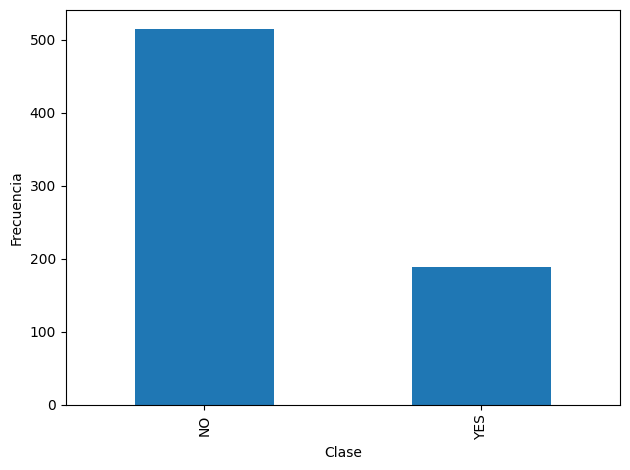

In [9]:
plt.figure()
df[target].value_counts().plot(kind='bar')
#plt.title('Distribución de Class/ASD')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

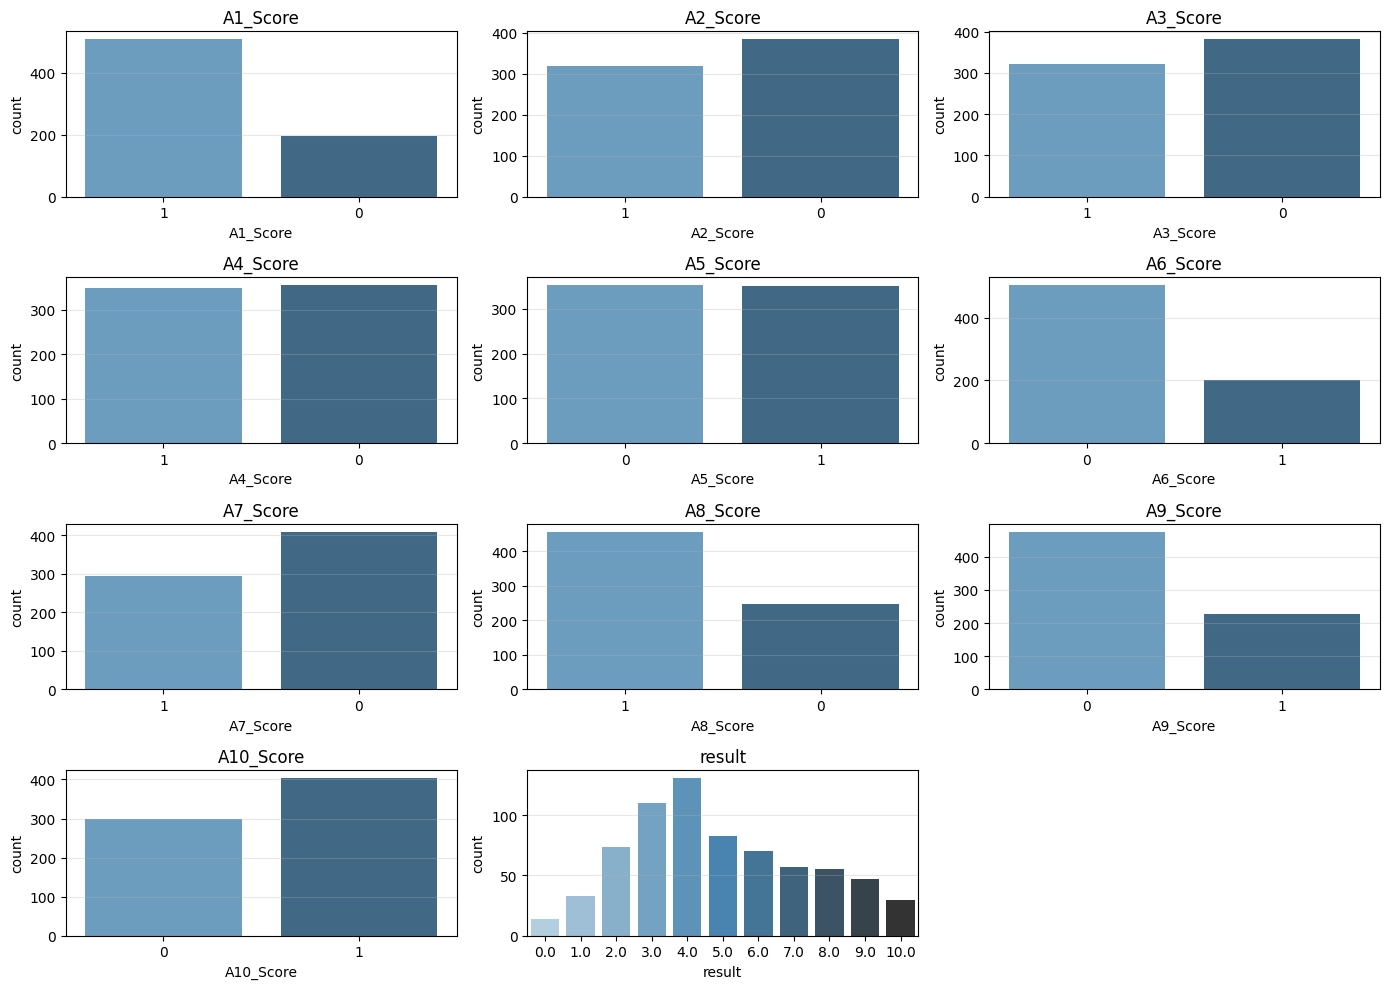

In [10]:
cols = [
    'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
    'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','result'
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(
        x=df[col],
        hue=df[col],
        palette="Blues_d",
        legend=False
    )
    plt.title(col)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_50886/579987952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


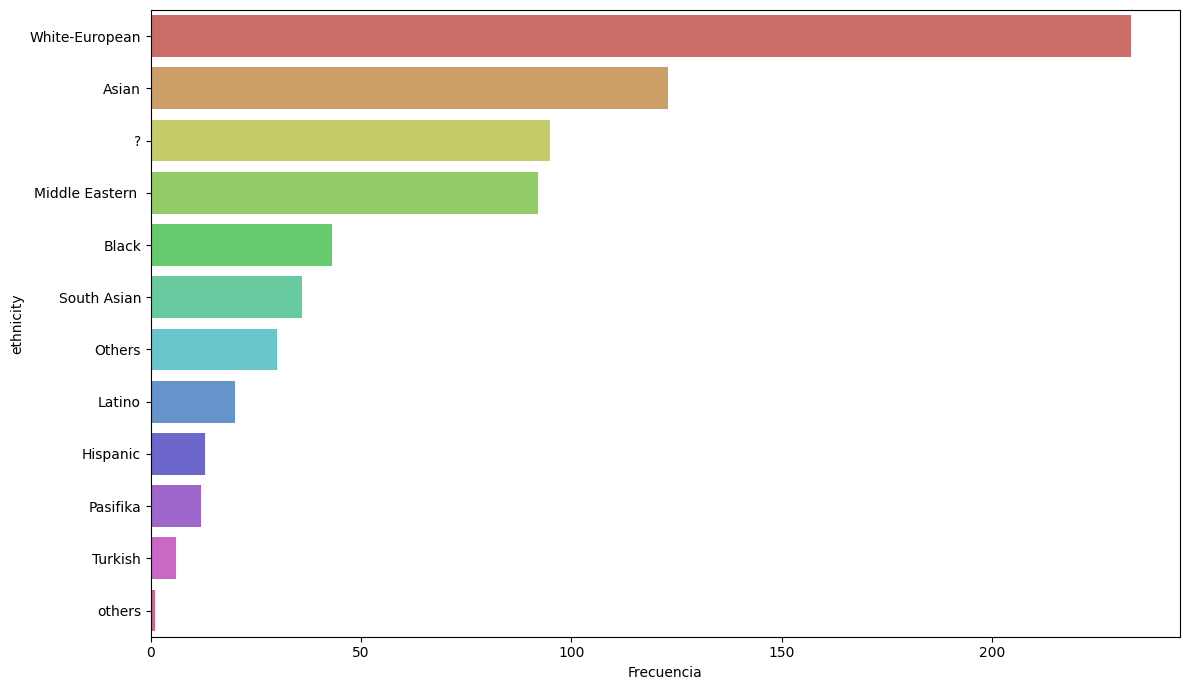

In [11]:
eth_counts = df["ethnicity"].value_counts()
colors = sns.color_palette("hls", len(eth_counts))

plt.figure(figsize=(12, 7))
sns.barplot(
    x=eth_counts.values,
    y=eth_counts.index,
    palette=colors
)

#plt.title("Distribución de ethnicity")
plt.xlabel("Frecuencia")
plt.ylabel("ethnicity")
plt.tight_layout()
plt.show()

/tmp/ipykernel_50886/2682602623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


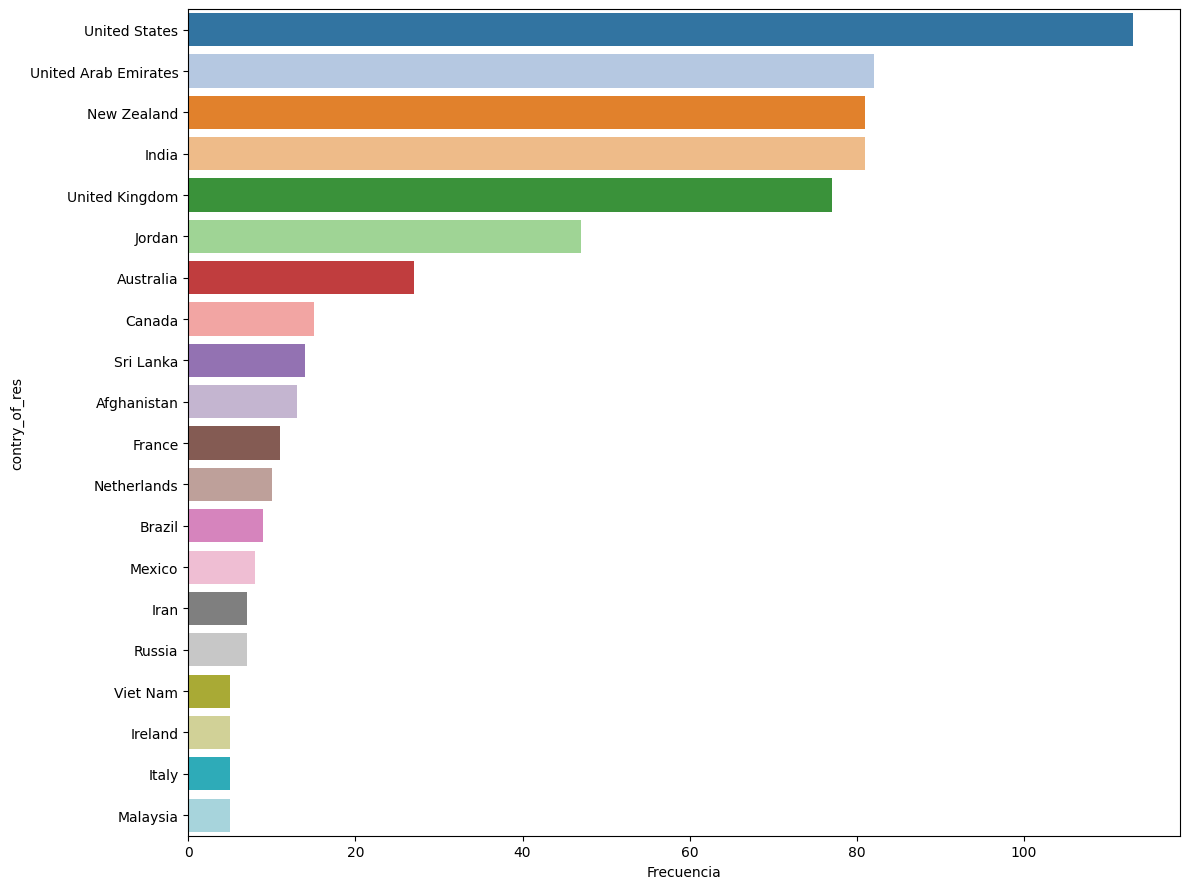

In [12]:
country_counts = df["contry_of_res"].value_counts().head(20)
colors = sns.color_palette("tab20", len(country_counts))

plt.figure(figsize=(12, 9))
sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    palette=colors
)

plt.xlabel("Frecuencia")
plt.ylabel("contry_of_res")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

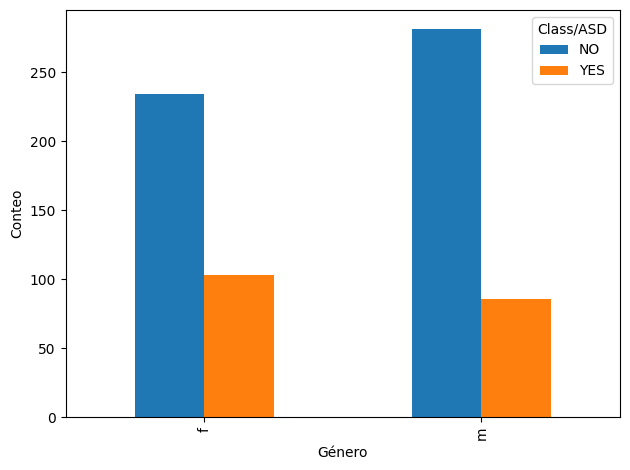

In [13]:

ct = pd.crosstab(df['gender'], df['Class/ASD'])
plt.figure()
ct.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

## <span id="sec6"></span> **6. Analysis of Categorical Variables**
---

In [14]:
print(df['gender'].value_counts())
print(df['gender'].value_counts(normalize=True)*100)
print("\n")


gender
m    367
f    337
Name: count, dtype: int64
gender
m    52.130682
f    47.869318
Name: proportion, dtype: float64




The distribution between genders is relatively balanced: 52% men and 48% women.
This indicates that the data set is not strongly biased towards a single gender.
It is useful to analyze whether there are differences in the score or prevalence of autism according to gender.

In [15]:

print(df['ethnicity'].value_counts().head())
print(df['ethnicity'].value_counts(normalize=True).head()*100)
print("\n")


ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
Name: count, dtype: int64
ethnicity
White-European     33.096591
Asian              17.471591
?                  13.494318
Middle Eastern     13.068182
Black               6.107955
Name: proportion, dtype: float64




The most represented group is White-European (33%), followed by Asian (17%) and an unknown category “?” (13%).
The presence of multiple groups allows us to study whether there is relevant cultural or demographic variation.
The value “?” is important, as it indicates missing or unreported data, which can influence the analysis.

In [16]:
print(df['contry_of_res'].value_counts().head(10))
print(df['contry_of_res'].value_counts(normalize=True).head(10)*100)
print("\n")

contry_of_res
United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
Jordan                   47
Australia                27
Canada                   15
Sri Lanka                14
Afghanistan              13
Name: count, dtype: int64
contry_of_res
United States           16.051136
United Arab Emirates    11.647727
New Zealand             11.505682
India                   11.505682
United Kingdom          10.937500
Jordan                   6.676136
Australia                3.835227
Canada                   2.130682
Sri Lanka                1.988636
Afghanistan              1.846591
Name: proportion, dtype: float64




The countries with the greatest representation are the USA, UAE, New Zealand, India and the UK, each with ~11–16% of the registrations.
This shows an international database, not restricted to a single region.
However, the distribution is not uniform, implying possible geographic bias in interpretation.

In [17]:
print(df['age_desc'].value_counts())
print(df['age_desc'].value_counts(normalize=True)*100)
print("\n")

age_desc
18 and more    704
Name: count, dtype: int64
age_desc
18 and more    100.0
Name: proportion, dtype: float64




The value of this variable is unique: "18 and more" in 100% of cases.
This confirms that the entire dataset corresponds only to adults.
Therefore, this variable does not contribute variability and can be eliminated from the analysis without losing information.

In [18]:
print(df['relation'].value_counts())
print(df['relation'].value_counts(normalize=True)*100)
print("\n")

relation
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64
relation
Self                        74.147727
?                           13.494318
Parent                       7.102273
Relative                     3.977273
Others                       0.710227
Health care professional     0.568182
Name: proportion, dtype: float64




La mayoría del cuestionario fue completado por la misma persona (Self): 74%, lo cual sugiere auto–evaluación predominante.
Un 13% no especificó su relación (“?”), y un pequeño porcentaje corresponde a padres, familiares u otros.
Esto influye en la interpretación porque la autoevaluación puede diferir en exactitud comparada con evaluaciones externas.


## <span id="sec7"></span> **7. Correlation Analysis**

---
The majority of the questionnaire was completed by the same person (Self): 74%, which suggests predominant self-assessment.
13% did not specify their relationship (“?”), and a small percentage corresponded to parents, relatives or others.
This influences interpretation because self-assessment may differ in accuracy compared to external assessments.


### <span id="sec71"></span> **7.1 Correlation Numeric Analysis**

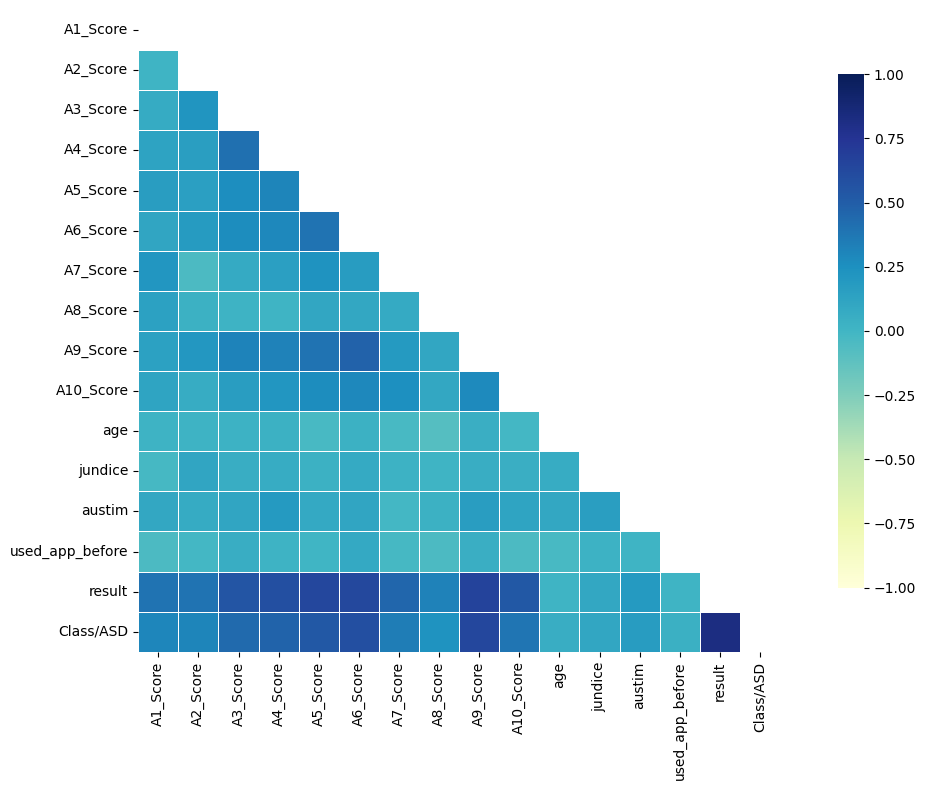

In [21]:
df_corr = df.copy()

binary_maps = {
    'yes': 1, 'no': 0,
    'YES': 1, 'NO': 0,
    '1': 1, '0': 0
}

for col in df_corr.columns:
    if col == 'gender':
        continue
    if df_corr[col].nunique(dropna=True) == 2:
        df_corr[col] = df_corr[col].map(binary_maps)

df_num = df_corr.select_dtypes(include=['int64', 'float64'])

corr = df_num.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap='YlGnBu',
    annot=False,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    vmin=-1, vmax=1
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()


plt.savefig(
    "../_attachments/img/correlacion_numericas_piramide.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### <span id="sec72"></span> **7.2 Asociation Categorical Analysis**

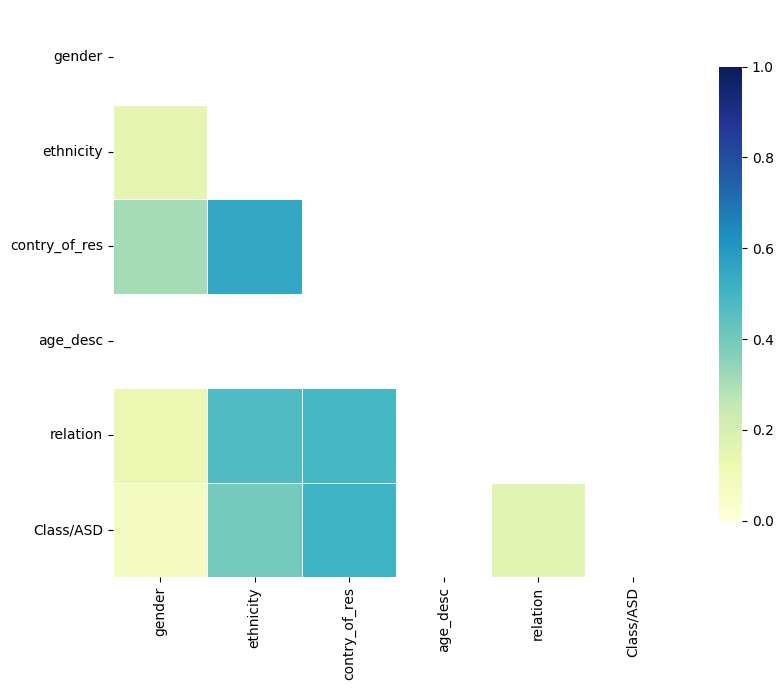

In [23]:
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(ct)[0]
    n = ct.to_numpy().sum()
    r, k = ct.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_vars = [
    'gender',
    'ethnicity',
    'contry_of_res',
    'age_desc',
    'relation',
    'Class/ASD'
]

cat_vars = [v for v in cat_vars if v in df.columns]

assoc = pd.DataFrame(
    np.zeros((len(cat_vars), len(cat_vars))),
    index=cat_vars,
    columns=cat_vars
)

for i in range(len(cat_vars)):
    for j in range(len(cat_vars)):
        assoc.iloc[i, j] = cramers_v(df[cat_vars[i]], df[cat_vars[j]])

mask = np.triu(np.ones_like(assoc, dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(
    assoc,
    mask=mask,
    cmap='YlGnBu',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    vmin=0,
    vmax=1
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(
    "../_attachments/img/asociasion_categoricas_piramide.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


## <span id="sec9"></span> **8. Initial Hypotheses**
---


During the analysis of the Autism Screening Adult dataset, it was evident that the male gender has a slightly higher proportion of positive diagnoses, which coincides with studies that indicate a higher prevalence of autism in women. In fact, this could be related to biological differences or lower detection in men.

Likewise, it was observed that a higher score on the AQ-10 test (result) notably increases the probability of positive classification, therefore, this variable is considered a strong predictor within the model. On the other hand, age did not show a relevant relationship with the diagnosis, since all participants are adults.

Therefore, the following initial hypotheses are proposed:

* A high result score increases the probability of a positive diagnosis.

* The female gender has a higher incidence of cases with signs of autism.

* Differences by country may be due more to technological access than to a higher actual prevalence.

In this way, these hypotheses will serve as the basis for the next modeling stage, aimed at validating the real influence of each variable on the detection of autism spectrum traits.